<a href="https://colab.research.google.com/github/yhfga18/ML_stuff/blob/main/5_RL_1024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reinforcement Learning

1. RL in a Nutshell
2. Setup
3. Environments 
4. Training
5. Testing and Evaluation 
6. Callbacks, Alt Algorithms, Architecture 
7. Projects 
    1. Breakout
    2. Self driving
    3. Custom Environments


1. Import dependencies 
2. Load & understand environment 
3. Train an RL model 
4. Save and reload model 
5. Evaluation 
6. Test model 
7. View logs in Tensorboard
8. Adding a callback to the training Stage 
9. Changing policies 
10. Using an Alternate algorithm 

In [ ]:
!pip install stable-baselines3[extra]

# stable-baselines3 basically vectorizes environment.

In [ ]:
# import dependencies 

import os
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# PPO ... Proximal Policy Optimization. One of RL algorithms (Base RL Class, A2C, DDPG, DQN, HER, ...)
# https://stable-baselines3.readthedocs.io/en/master/

In [ ]:
# only to make render work in Colab
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet==v1.3.2
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

  Using cached pyglet-1.3.2-py2.py3-none-any.whl (1.0 MB)
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires pyglet<=1.5.0,>=1.4.0, but you have pyglet 1.3.2 which is incompatible.


In [ ]:
# only to make render work in Colab
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
# only to make render work in Colab
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


In [ ]:
env_name = 'CartPole-v0'
env = gym.make(env_name)

Episode:1 Score:51.0
Episode:2 Score:17.0
Episode:3 Score:23.0
Episode:4 Score:10.0
Episode:5 Score:22.0


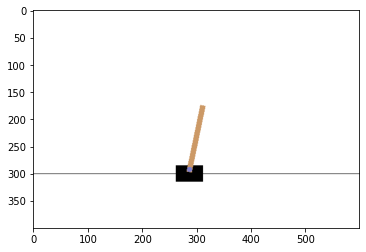

In [ ]:
episodes = 5

for episode in range(1, episodes+1):
    state = env.reset() # initialize to get initial set of observation
    # array([-0.00629592,  0.03120906,  0.04934884,  0.00452497]) = observation
    # pass this observation to agent to determine what the best type of action is to be able to maximize our reward
    # and get that bar in the straightest possible position
    
    done = False
    # wether or not the episode is done
    
    score = 0
    
    # make env.render work in Colab. 
    while not done:
        prev_screen = env.render(mode='rgb_array') # view graphical representation of that env
        plt.imshow(prev_screen)
        action = env.action_space.sample() # generating random action 
        n_state, reward, done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))

    # ↓ only works in Jypter notebook
    # while not done:
    #     env.render() 
    #     action = env.action_space.sample()
    #     n_state, reward, done, info = env.step(action)
    #     score += reward
    # print('Episode:{} Score:{}'.format(episode, score))

env.close() 

